In [12]:
%matplotlib inline

In [26]:

data = pd.DataFrame()
n = 100
for i in range(100):
    data['x'+str(i)] = np.random.normal(loc=i, size=n)
data['y'] = data['x1'] * data['x2'] * data['x3'] + np.random.normal(loc=0, size=n)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Columns: 101 entries, x0 to y
dtypes: float64(101)
memory usage: 79.7 KB


In [28]:
X, y = data[[c for c in data if c.startswith('x')]], data['y']

In [39]:
GradientBoostingRegressor()

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [49]:
from ml.model import models, common, importances
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.cross_validation import KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.grid_search import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import RandomizedLogisticRegression, ElasticNetCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor

gbr_grid = {
    'n_estimators': [1, 2, 5, 10, 100],
    'learning_rate': [.001, .01, .1, 1, 2],
    'max_features': [None, 0.1],
    #'subsample': [1., .3, .1],
    'min_samples_leaf': [1, 3, 5],
    'max_depth': [1, 3, 5, 9]
}
etr_grid = {
    'n_estimators': [1, 10, 100, 250, 500],
    'min_samples_leaf': [1, 3, 5, 9],
    'max_depth': [1, 5, 9]
}
svr_grid1 = { 'C': np.logspace(-10, -2, 5), 'degree': [1, 2, 3], 'kernel': ['linear'] }
svr_grid2 = { 'C': np.logspace(-10, -2, 5), 'gamma': [.01, .001, .0001], 'kernel': ['rbf']}
knn_grid = {'n_neighbors': [3,5,10,15,25,50,75,100], 'weights': ['uniform', 'distance']}

n_jobs = 1
cv = 2
clfs = {
    'gbr': GridSearchCV(GradientBoostingRegressor(), gbr_grid, cv=cv, n_jobs=n_jobs),
    #'gbr': GradientBoostingRegressor(),
    #'etr': RandomizedSearchCV(ExtraTreesRegressor(), etr_grid, n_iter=30, cv=cv, n_jobs=n_jobs),
    #'knn': RandomizedSearchCV(KNeighborsRegressor(), knn_grid, n_iter=16, cv=cv, n_jobs=n_jobs)
    #'svr_linear': RandomizedSearchCV(SVR(), svr_grid1, n_iter=10, cv=cv, n_jobs=n_jobs),
    #'svr_rbf': RandomizedSearchCV(SVR(), svr_grid2, n_iter=10, cv=cv, n_jobs=n_jobs),
    'lasso': LassoCV(cv=cv, n_jobs=n_jobs, max_iter=10000),
    #'enet': ElasticNetCV(cv=cv, n_jobs=n_jobs, max_iter=10000),
}
res = models.run_regressors(
    X, y, clfs, KFold(len(y), 8), keep_X=False, 
    par_n_jobs=-1, par_verbose=1,
    log_file='/tmp/test_cv.log')

Beginning cross validation (see /tmp/test_cv.log for progress updates)


[Parallel(n_jobs=-1)]: Done   1 out of   8 | elapsed:   50.9s remaining:  5.9min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   52.3s finished
INFO:ml.model.log:Running model LassoCV on fold 1
INFO:ml.model.log:Running model LassoCV on fold 2
INFO:ml.model.log:Running model LassoCV on fold 3
INFO:ml.model.log:Running model LassoCV on fold 4
INFO:ml.model.log:Running model LassoCV on fold 5
INFO:ml.model.log:Running model LassoCV on fold 6
INFO:ml.model.log:Running model LassoCV on fold 7
INFO:ml.model.log:Running model LassoCV on fold 8
INFO:ml.model.log:Running model GradientBoostingRegressor on fold 1
INFO:ml.model.log:Running model GradientBoostingRegressor on fold 2
INFO:ml.model.log:Running model GradientBoostingRegressor on fold 3
INFO:ml.model.log:Running model GradientBoostingRegressor on fold 4
INFO:ml.model.log:Running model GradientBoostingRegressor on fold 5
INFO:ml.model.log:Running model GradientBoostingRegressor on fold 6
INFO:ml.model.log:Running model Gradient

In [56]:
from ml.model import summaries as ml_summary

In [57]:
ml_summary.summarize_grid_parameters(res)

model_name  variable                
gbr         learning_rate     0.10      6
                              0.01      2
            max_depth         3.00      4
                              5.00      3
                              9.00      1
            min_samples_leaf  3.00      5
                              1.00      3
            n_estimators      100.00    5
                              10.00     3
dtype: int64

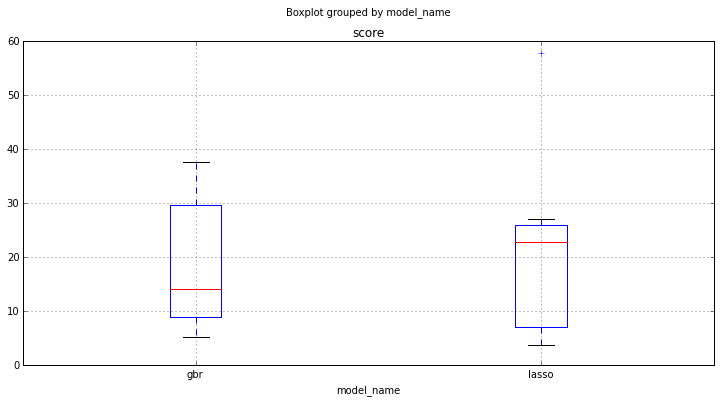

In [58]:
from sklearn.metrics import mean_squared_error
score_func = lambda clf, y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))
ml_summary.plot_model_scores(res, score_func=score_func)

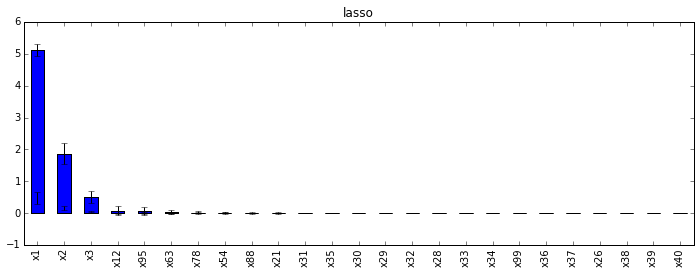

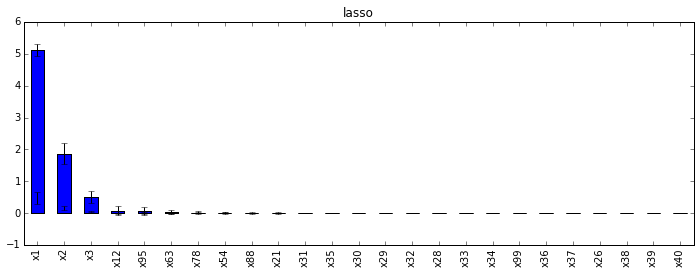

In [61]:
ml_summary.plot_feature_importance(res)

# Hyperopt

In [110]:
d = \
    [(1, 1, 0*n+i) for i in range(n)] + \
    [(1, 2, 1*n+i) for i in range(n)] + \
    [(1, 3, 2*n+i) for i in range(n)] + \
    [(2, 1, 3*n+i) for i in range(n)] + \
    [(2, 2, 4*n+i) for i in range(n)] + \
    [(2, 3, 5*n+i) for i in range(n)] + \
    [(3, 1, 6*n+i) for i in range(n)] + \
    [(3, 2, 7*n+i) for i in range(n)] + \
    [(3, 3, 8*n+i) for i in range(n)]
d = pd.DataFrame(d, columns=['g1', 'g2', 'v'])
d.head()

,g1,g2,v
0,1,1,0
1,1,1,1
2,1,1,2
3,1,2,3
4,1,2,4


In [109]:
from sklearn.tree import DecisionTreeRegressor
clf = RandomForestRegressor(n_estimators=1, max_depth=9, max_features=2, bootstrap=False)
#clf = DecisionTreeRegressor(max_depth=9)
clf.fit(d[['g1', 'g2']], d['v'])
X = d[['g1', 'g2']].drop_duplicates()
X['v'] = clf.predict(X)
X

,g1,g2,v
0,1,1,1
3,1,2,4
6,1,3,7
9,2,1,10
12,2,2,13
15,2,3,16
18,3,1,19
21,3,2,22
24,3,3,25


In [111]:
n = 10000
d = []
for gender in [1,2]:
    for age in range(1, 56):
        for i in range(n):
            d.append((gender, age, np.random.sample(size=1)))
d = pd.DataFrame(d, columns=['g1', 'g2', 'v'])

In [114]:
from sklearn.tree import DecisionTreeRegressor
max_depth = len(d['g1'].unique()) * len(d['g2'].unique())
clf = RandomForestRegressor(n_estimators=1, max_depth=max_depth, max_features=2, bootstrap=False)
#clf = DecisionTreeRegressor(max_depth=9)
%time clf.fit(d[['g1', 'g2']], d['v'])

CPU times: user 214 ms, sys: 7.12 ms, total: 221 ms
Wall time: 220 ms


RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=110,
           max_features=2, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

# Hyperopt

In [1]:
data = pd.DataFrame()
n = 100
for i in range(10):
    data['x'+str(i)] = np.random.normal(loc=i, size=n)
data['y'] = data['x1'] * data['x2'] * data['x3'] + np.random.normal(loc=0, size=n)
X, y = data[[c for c in data if c.startswith('x')]], data['y']
X.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,0.664564,-0.259451,2.401916,3.191342,4.118466,3.939539,7.246084,7.962955,8.253644,9.111093
1,0.094343,1.819149,-0.465055,1.386125,3.742882,6.584413,6.084685,5.227400,7.880067,9.767055
2,-0.127145,0.204692,2.416559,1.960135,3.270164,4.636479,5.865315,7.229550,8.110385,9.753628
3,1.359935,0.336033,2.284727,3.344627,4.836972,4.328507,8.463695,6.199414,10.928526,9.560903
4,-1.950421,1.963044,5.432607,0.790934,4.315293,5.628769,7.970185,8.174267,9.426761,6.734435


In [3]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

scope.define_if_new(RandomForestRegressor)
scope.define_if_new(GradientBoostingRegressor)

space = hp.pchoice('estimator', [
    (0.1, scope.RandomForestRegressor()),
    (0.2, scope.GradientBoostingRegressor())
    #(0.3, scope.SVC(C=C, kernel=’rbf’, width=hp.lognormal(’svm_rbf_width’, 0, 1))),
#     (0.4, scope.DTree(
#                 criterion=hp.choice(’dtree_criterion’, [’gini’, ’entropy’]), 
#                 max_depth=hp.choice(’dtree_max_depth’, [None, hp.qlognormal(’dtree_max_depth_N’, 2, 2, 1)])))
])

def obj_func(params):
    print(params)
    val = np.random.normal()
    return {'loss': val, 'status': STATUS_OK}

trials = Trials()
best = hyperopt.fmin(obj_func, space, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:', best)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)
GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)
GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             random_state=None, subsample=1.0, verbose=0, warm_start=Fa